In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Загружаем встроенный датасет "Ирисы"
iris = datasets.load_iris()
print("Ключи словаря iris:", iris.keys())
print("Описание датасета:\n", iris['DESCR'][:200], '...')

Ключи словаря iris: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Описание датасета:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attribu ...


Форма матрицы признаков X: (150, 4)
Первые 5 строк X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 

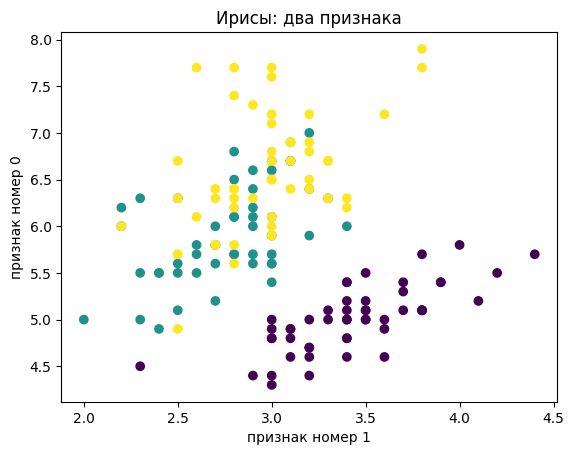

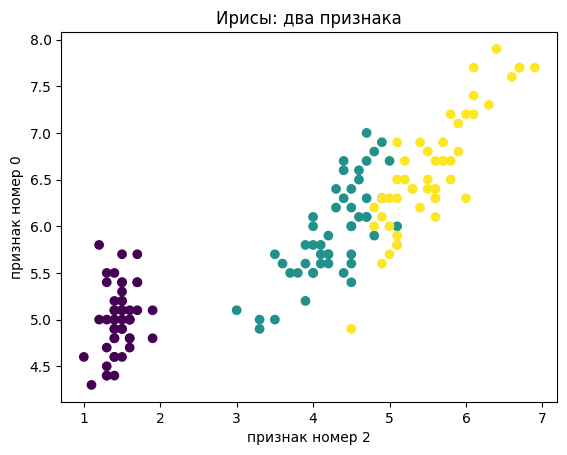

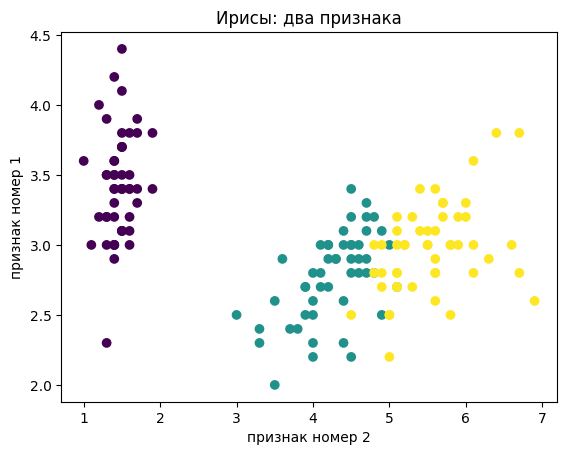

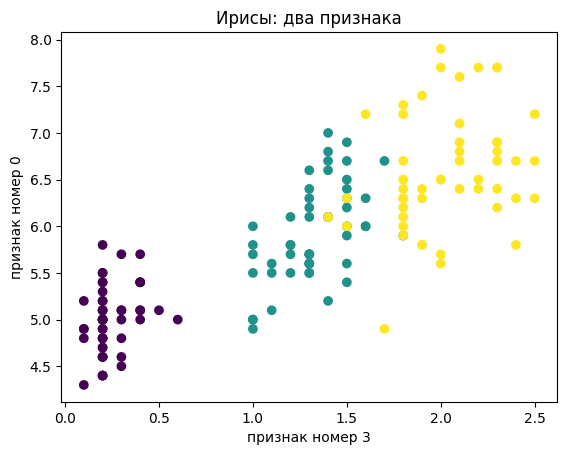

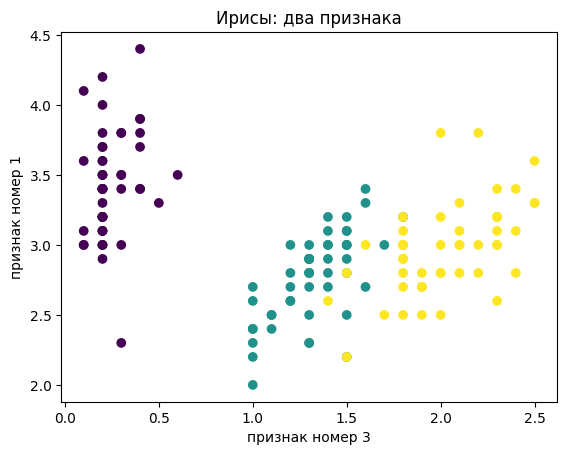

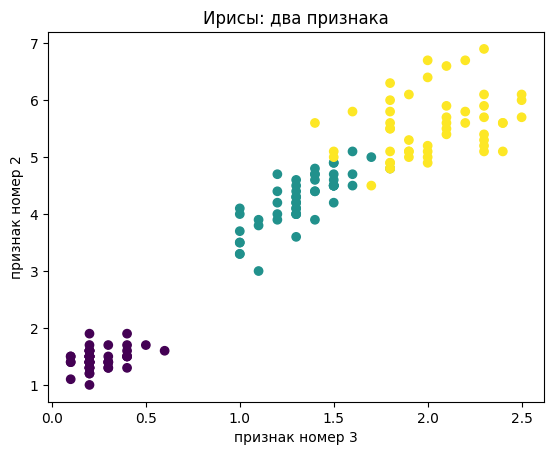

In [12]:
# X - признаки (числовые характеристики цветов), y - метки классов (виды ирисов)
X = iris.data
y = iris.target

print("Форма матрицы признаков X:", X.shape)
print("Первые 5 строк X:\n", X)
print("Метки классов:", np.unique(y))

for i in range(4):
    for j in range(i):
        plt.scatter(X[:, i], X[:, j], c=y)
        plt.xlabel(f'признак номер {i}')
        plt.ylabel(f'признак номер {j}')
        plt.title('Ирисы: два признака')
        plt.show()

In [13]:
# Разбиваем X и y на обучающую и тестовую части (по 75% и 25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

print("Форма обучающей выборки:", X_train.shape)
print("Форма тестовой выборки:", X_test.shape)

Форма обучающей выборки: (112, 4)
Форма тестовой выборки: (38, 4)


Найдем самое оптимальное количество ближайших соседей в KNN для самой высокой точности идентификации.

Точность на тестовой выборке: 0.97


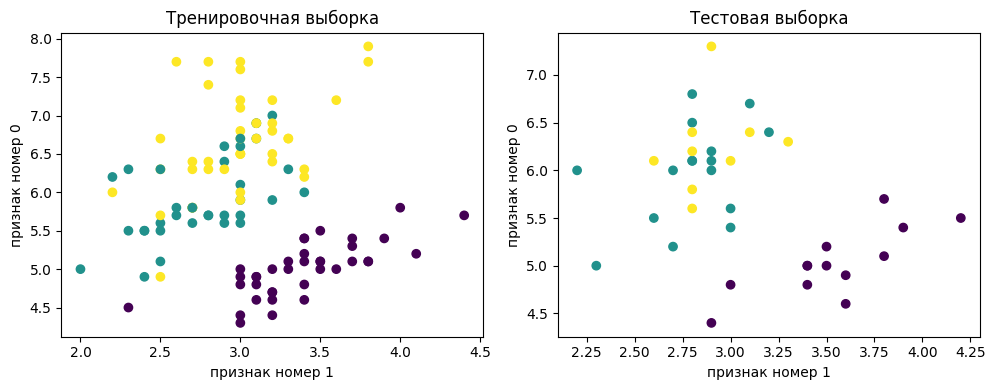

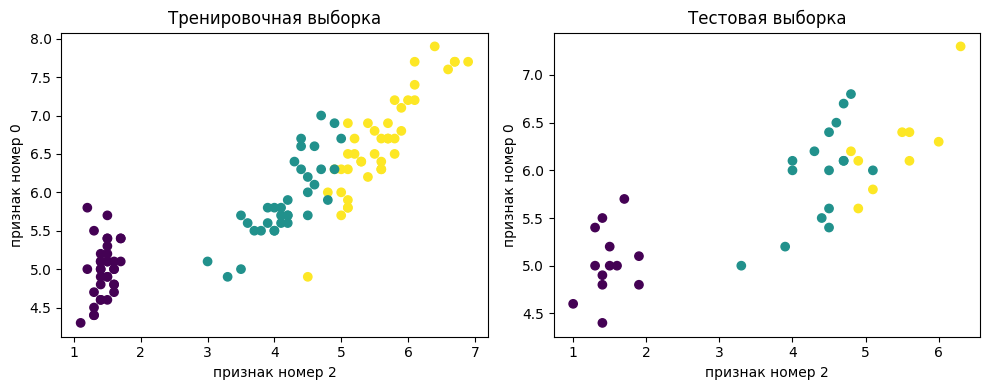

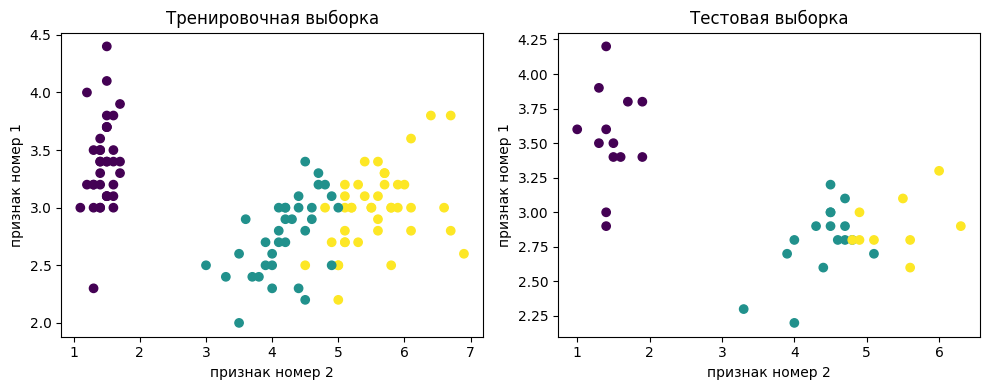

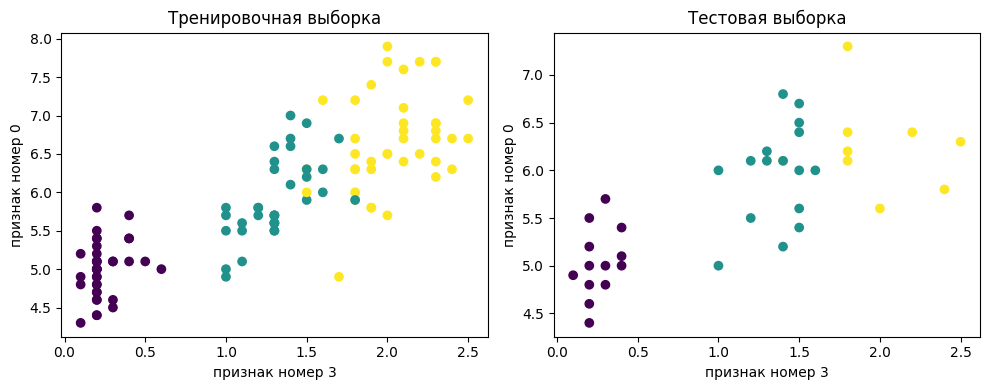

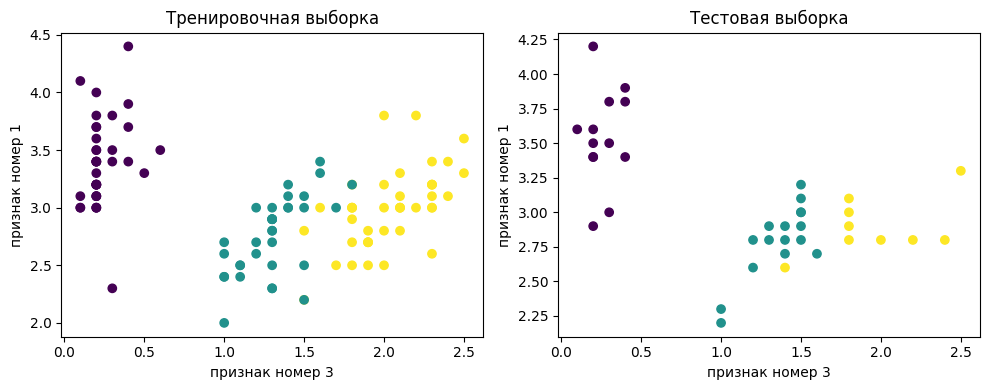

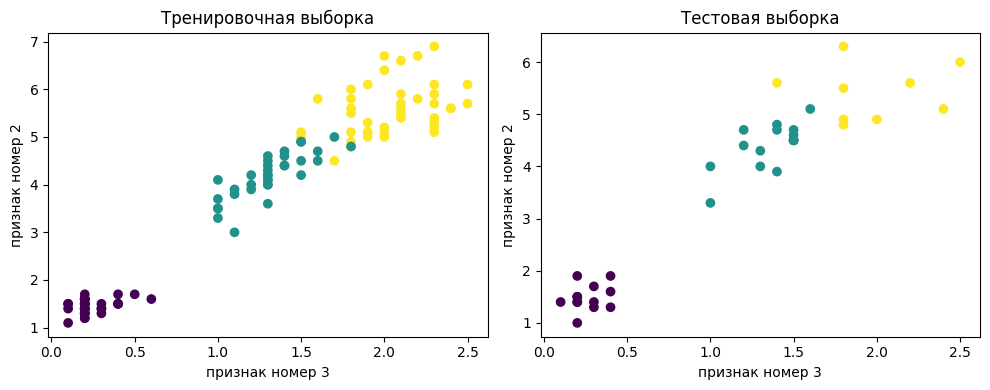

In [14]:
# количество ирисов в тренировочной выборке
n = len(y_train)

# Создаём модель KNN. определим самый оптимальный k (количество соседей) для самого точного идентифицирования ирисов.
max_accuracy = 0
best_k = 0
for k in range(1,n):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Обучаем модель на обучающих данных
    knn.fit(X_train, y_train)

    # Делаем прогноз на тестовых данных
    y_pred = knn.predict(X_test)

    # Оцениваем качество: доля правильных ответов
    accuracy = np.mean(y_pred == y_test)    
    if (accuracy > max_accuracy):
        max_accuracy = accuracy
        best_k = k

# визуализируем наилучшее разделение выборки
knn = KNeighborsClassifier(n_neighbors=best_k)
# Обучаем модель на обучающих данных
knn.fit(X_train, y_train)
# Делаем прогноз на тестовых данных
y_pred = knn.predict(X_test)
# Точность
print(f"Точность на тестовой выборке: {max_accuracy:.2f}")

# визуализируем тренировочные и тестовые ирисы

for i in range(4):
    for j in range(i):
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # две оси: слева и справа

        # Слева — тренировочная выборка
        axes[0].scatter(X_train[:, i], X_train[:, j], c=y_train)
        axes[0].set_xlabel(f'признак номер {i}')
        axes[0].set_ylabel(f'признак номер {j}')
        axes[0].set_title('Тренировочная выборка')

        # Справа — тестовая выборка
        axes[1].scatter(X_test[:, i], X_test[:, j], c=y_test)
        axes[1].set_xlabel(f'признак номер {i}')
        axes[1].set_ylabel(f'признак номер {j}')
        axes[1].set_title('Тестовая выборка')

        plt.tight_layout()
        plt.show()

accuracy_score — считает точность (accuracy), то есть долю правильно угаданных ответов.

confusion_matrix — строит матрицу ошибок (confusion matrix), чтобы понять, где модель ошиблась.

ConfusionMatrixDisplay — удобно визуализирует матрицу ошибок.

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {accuracy:.2f}")

Точность на тестовой выборке: 0.97


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n", cm)

Матрица ошибок:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


Первая строка: [13 0 0]

Было 13 объектов настоящего класса 0 (например, setosa).

Все 13 распознаны правильно (модель ни разу не перепутала их с классами 1 или 2).

Вторая строка: [0 15 1]

Было 16 объектов настоящего класса 1 (например, versicolor).

15 из них распознаны правильно (во второй колонке, класс 1).

1 объект модель перепутала с классом 2 (третья колонка).

Третья строка: [0 0 9]

Было 9 объектов настоящего класса 2 (например, virginica).

Все 9 определены правильно (в третьей колонке).

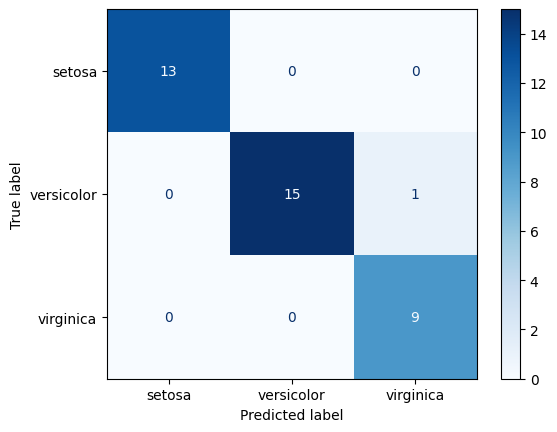

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.show()